In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A gift basket containes roses, chocolate and strawberries, but a gift basket is not the price of the three combined.

In [47]:
# Initialize dataframes
df1 = pd.read_csv('data/round3/trades_round_3_day_0_nn.csv', delimiter=';')
df2 = pd.read_csv('data/round3/trades_round_3_day_1_nn.csv', delimiter=';')
df3 = pd.read_csv('data/round3/trades_round_3_day_2_nn.csv', delimiter=';')

# Concatenate DataFrames vertically
combined_df = pd.concat([df1, df2, df3], ignore_index=True)
prices = combined_df[['symbol', 'price']]

In [48]:
# group by symbol
strawberry_prices = prices[prices['symbol'] == 'STRAWBERRIES']
rose_prices = prices[prices['symbol'] == 'ROSES']
chocolate_prices = prices[prices['symbol'] == 'CHOCOLATE']
basket_prices = prices[prices['symbol'] == 'GIFT_BASKET']

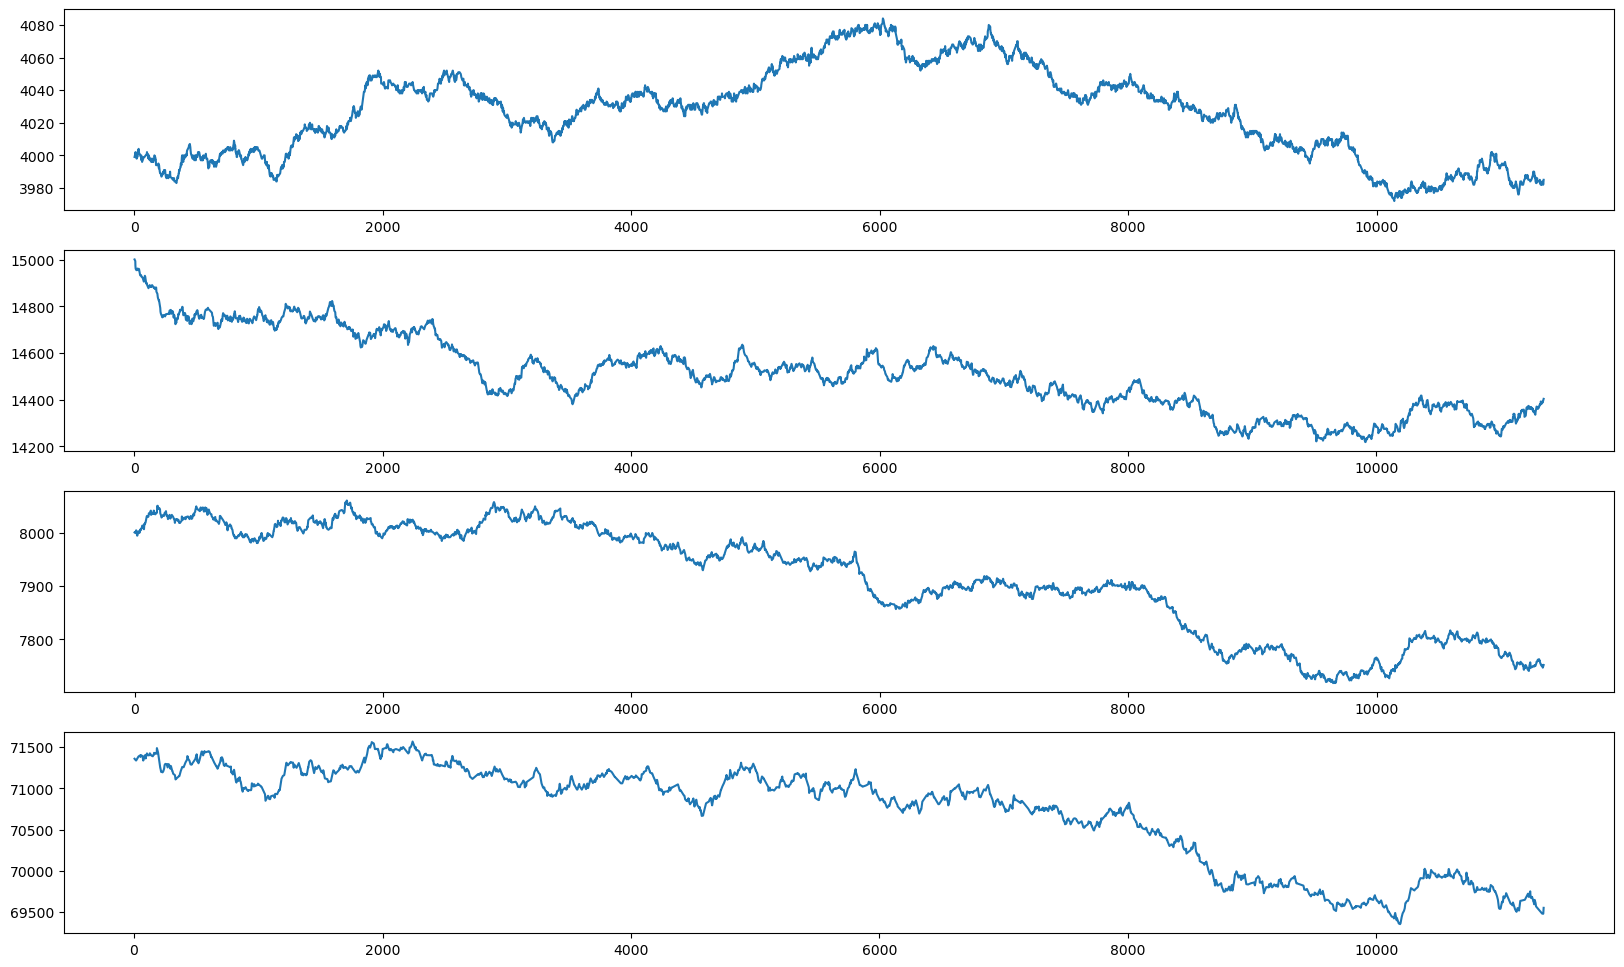

In [49]:
# plot
fig, axs = plt.subplots(4, figsize=(20, 12))

axs[0].plot(strawberry_prices['price'], label='Strawberries')
axs[1].plot(rose_prices['price'], label='Roses')
axs[2].plot(chocolate_prices['price'], label='Chocolate')
axs[3].plot(basket_prices['price'], label='Gift Basket')

# Individual Strategies: EMA

In [50]:
def calculate_instant_ema(price_list, window_size=12):
    """
    Calculate the instantaneous Exponential Moving Average (EMA) of a price list.
    
    Parameters:
    price_list (list): List of prices.
    window_size (int): The period over which the EMA is calculated. Default is 12.

    Returns:
    float: The instantaneous EMA of the last price in the list.
    """
    if len(price_list) == 0:
        return None
    
    multiplier = 2 / float(window_size + 1)
    ema = price_list[0]  # Start with the first price as initial EMA

    for price in price_list[1:]:
        ema = (price - ema) * multiplier + ema

    return ema

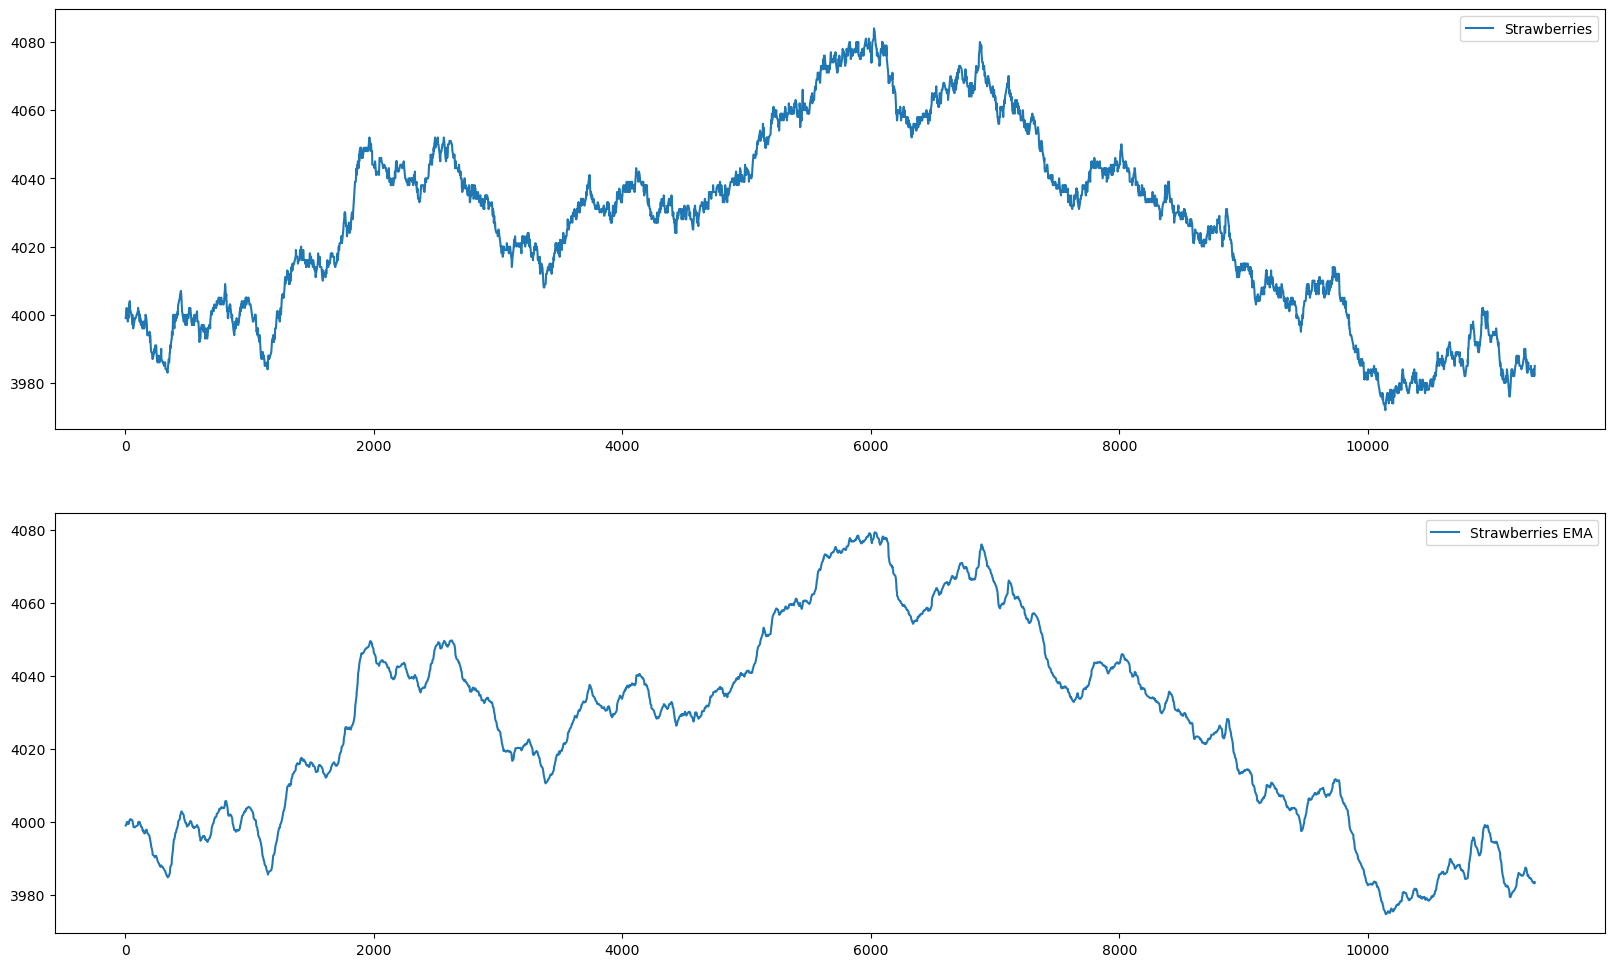

In [66]:
# Calculate the instantaneous EMA for each price in strawberry_prices
strawberry_prices_list = strawberry_prices['price'].tolist()
strawberry_ema = [calculate_instant_ema(strawberry_prices_list[:i+1]) for i in range(len(strawberry_prices_list))]

# Create a new DataFrame for the EMA values
strawberry_ema_df = pd.DataFrame(strawberry_ema, columns=['EMA'], index=strawberry_prices.index)

# Plot the original prices and the EMA values
fig, axs = plt.subplots(2, figsize=(20, 12))

axs[0].plot(strawberry_prices['price'], label='Strawberries')
axs[0].legend()

axs[1].plot(strawberry_ema_df['EMA'], label='Strawberries EMA')
axs[1].legend()

plt.show()

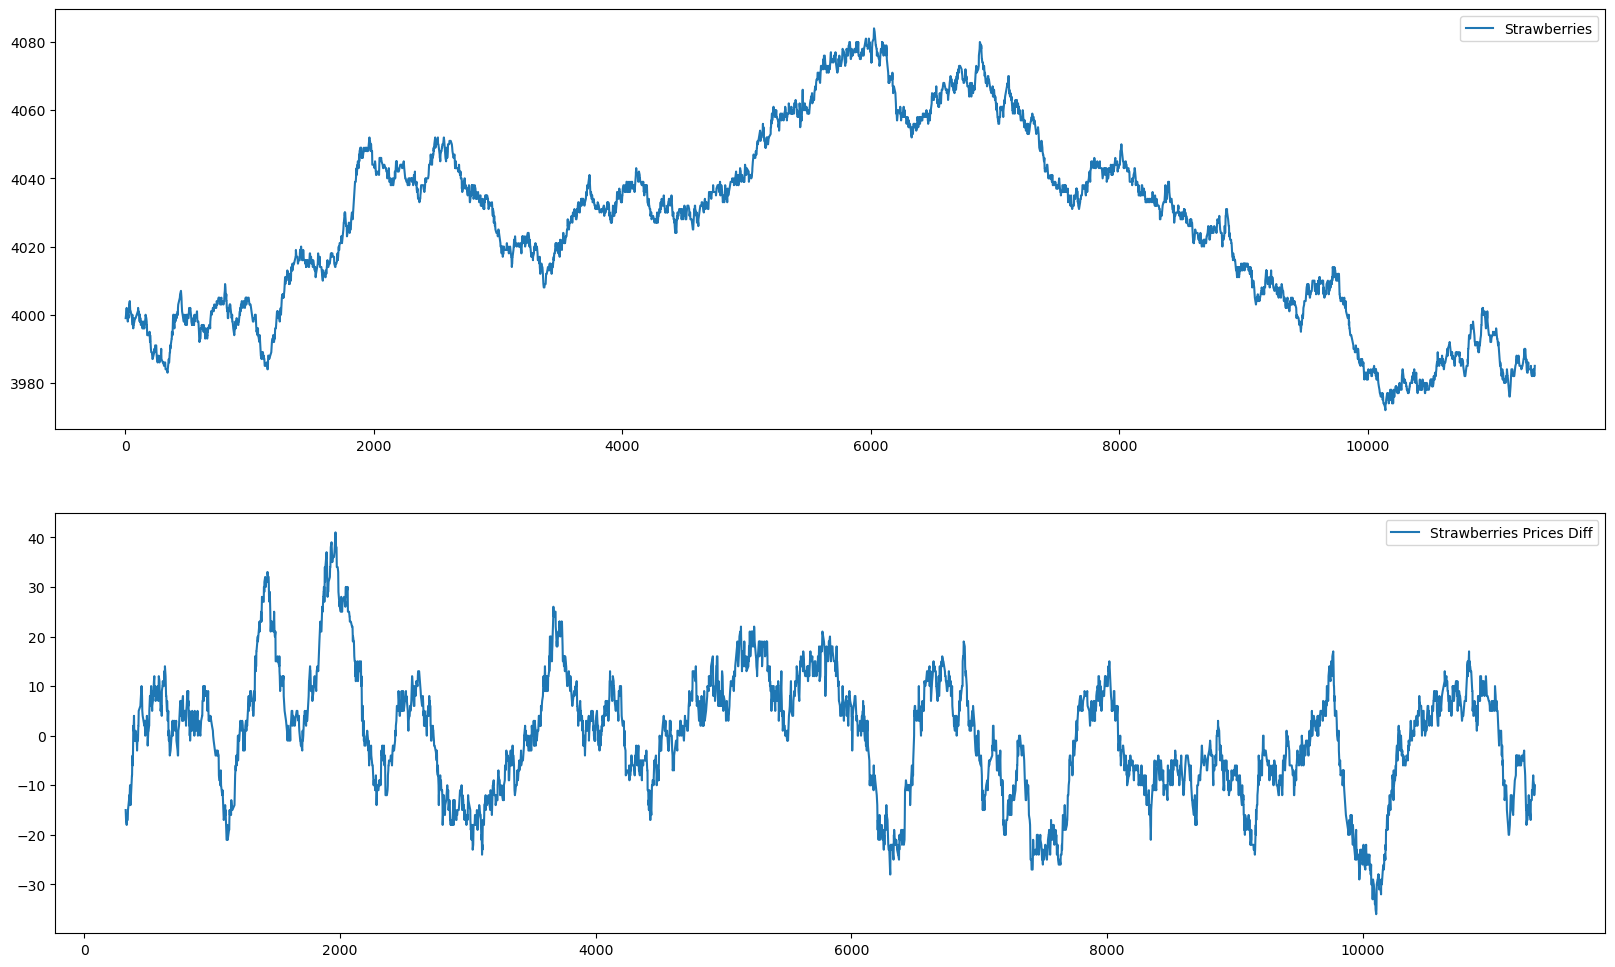

In [67]:
strawberry_prices_diff = strawberry_prices['price'].diff(100)

# Plot the original prices and the EMA values
fig, axs = plt.subplots(2, figsize=(20, 12))

axs[0].plot(strawberry_prices['price'], label='Strawberries')
axs[0].legend()

axs[1].plot(strawberry_prices_diff, label='Strawberries Prices Diff')
axs[1].legend()

plt.show()

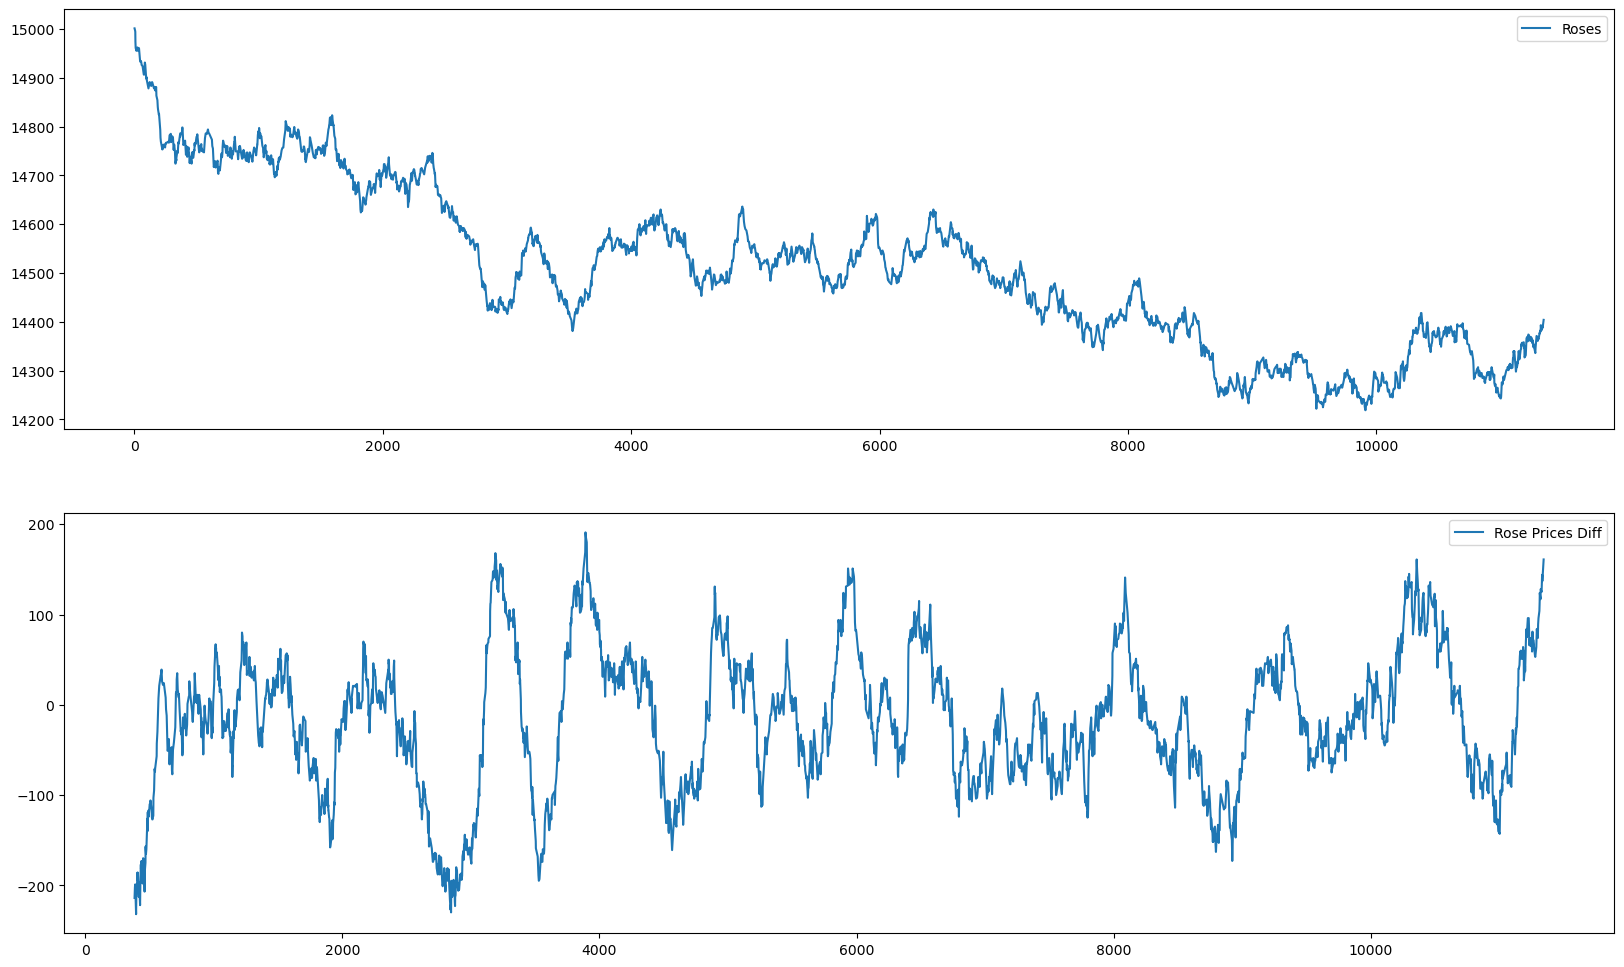

In [68]:
rose_prices_diff = rose_prices['price'].diff(100)

# Plot the original prices and the EMA values
fig, axs = plt.subplots(2, figsize=(20, 12))

axs[0].plot(rose_prices['price'], label='Roses')
axs[0].legend()

axs[1].plot(rose_prices_diff, label='Rose Prices Diff')
axs[1].legend()

plt.show()

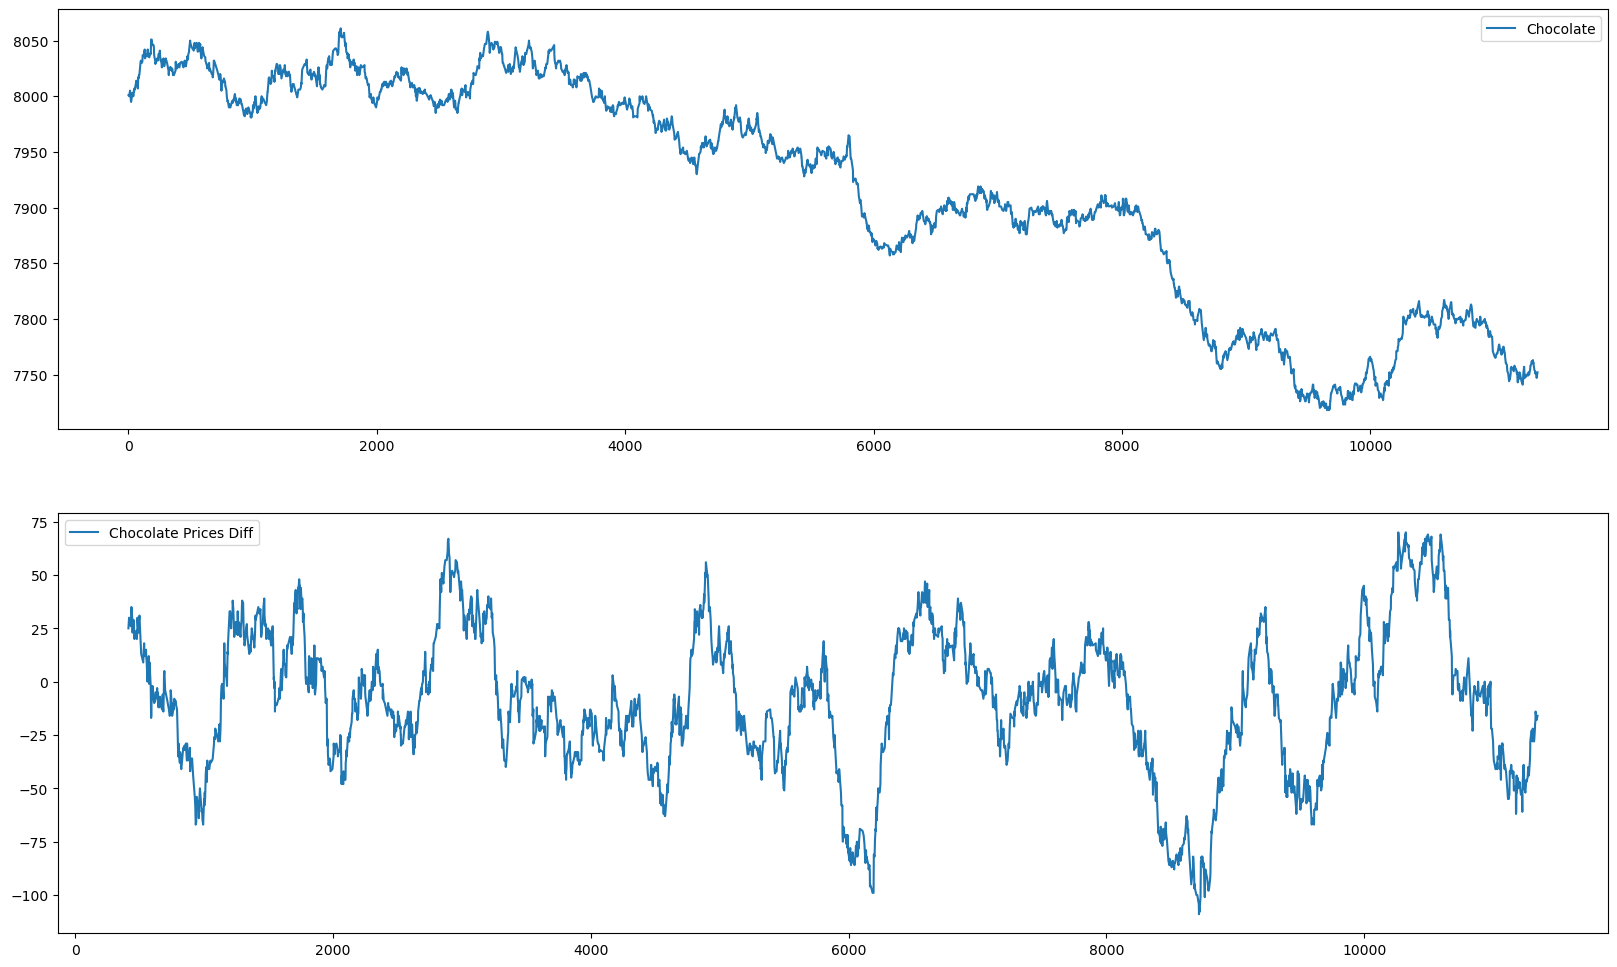

In [72]:
chocolate_price_diffs = chocolate_prices['price'].diff(100)

# Plot the original prices and the EMA values
fig, axs = plt.subplots(2, figsize=(20, 12))

axs[0].plot(chocolate_prices['price'], label='Chocolate')
axs[0].legend()

axs[1].plot(chocolate_price_diffs, label='Chocolate Prices Diff')
axs[1].legend()

plt.show()